# Análisis del conjunto de datos "Online_Retail"
### clase de "Curso de Python para Ciencia de Datos"
datos tomados de la clase
https://www.kaggle.com/datasets/tunguz/online-retail

# 1. Carga de datos

In [303]:
import pandas as pd
# lectura del archivo
ruta_archivo=r"Online_Retail.csv"
data_tienda=pd.read_csv(ruta_archivo,encoding='latin-1')
#primera vista a los primeros y últimos datos
print(data_tienda.head(3),'\n')
print(data_tienda.tail(3),'\n')

  InvoiceNo StockCode                         Description  Quantity  \
0    536365    85123A  WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                 WHITE METAL LANTERN         6   
2    536365    84406B      CREAM CUPID HEARTS COAT HANGER         8   

    InvoiceDate  UnitPrice  CustomerID         Country  
0  12/1/10 8:26       2.55     17850.0  United Kingdom  
1  12/1/10 8:26       3.39     17850.0  United Kingdom  
2  12/1/10 8:26       2.75     17850.0  United Kingdom   

       InvoiceNo StockCode                      Description  Quantity  \
541906    581587     23254    CHILDRENS CUTLERY DOLLY GIRL          4   
541907    581587     23255  CHILDRENS CUTLERY CIRCUS PARADE         4   
541908    581587     22138    BAKING SET 9 PIECE RETROSPOT          3   

          InvoiceDate  UnitPrice  CustomerID Country  
541906  12/9/11 12:50       4.15     12680.0  France  
541907  12/9/11 12:50       4.15     12680.0  France  
541908  12/9/11 12:50      

### los datos se componen de las siguientes columnas

In [304]:
print(data_tienda.columns)

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')


### en el conjunto de datos faltan los siguientes datos

In [305]:
print("faltan los siguientes datos: \n",data_tienda.isnull().sum())

faltan los siguientes datos: 
 InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64


### los datos se describen como

In [306]:
numero_filas,numero_columnas=data_tienda.shape
print("\nNumero de filas ",numero_filas," numero de columnas ",numero_columnas,"\n")
print(data_tienda.dtypes,'\n')
print(data_tienda.describe())


Numero de filas  541909  numero de columnas  8 

InvoiceNo       object
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
UnitPrice      float64
CustomerID     float64
Country         object
dtype: object 

            Quantity      UnitPrice     CustomerID
count  541909.000000  541909.000000  406829.000000
mean        9.552250       4.611114   15287.690570
std       218.081158      96.759853    1713.600303
min    -80995.000000  -11062.060000   12346.000000
25%         1.000000       1.250000   13953.000000
50%         3.000000       2.080000   15152.000000
75%        10.000000       4.130000   16791.000000
max     80995.000000   38970.000000   18287.000000


# 2. limpieza de datos y adecuación de los mismos

para este caso no se borrara ningún dato en "CustomerID" no es relevante para la estadística y "Description" hace alucino al nombre del producto ,estos si se borran

In [307]:
print(data_tienda.shape)
#se eliminan los datos faltantes de la columna 'Description'
data_tienda=data_tienda.dropna(subset=['Description'])
print(data_tienda.shape)

(541909, 8)
(540455, 8)


identificar las columnas irrelevantes

con respecto a las otras columnas vamos a ver, si hay un 1 en los sub niveles esa columna se omite para el análisis

In [308]:
columnas_object_nombres=data_tienda.select_dtypes(include=['object']).columns.to_list()
for columna in columnas_object_nombres:
    print(f'columna {columna} : {data_tienda[columna].nunique()} sub niveles') 

columna InvoiceNo : 24446 sub niveles
columna StockCode : 3958 sub niveles
columna Description : 4223 sub niveles
columna InvoiceDate : 22309 sub niveles
columna Country : 38 sub niveles


la columna 'InvoiceDate' deberían ser fechas , se van a pasar a fecha

In [309]:
data_tienda['InvoiceDate']=pd.to_datetime(data_tienda['InvoiceDate'])

C:\Users\User\AppData\Local\Temp\ipykernel_21216\3916319733.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data_tienda['InvoiceDate']=pd.to_datetime(data_tienda['InvoiceDate'])


eliminación de filas repetidas , ojo en este caso si se puede hacer porque la columna de la fecha incluye la hora 

In [310]:
print("el tamaño del conjunto de datos es : ",data_tienda.shape)
data_tienda.drop_duplicates(inplace=True)
print("el tamaño del conjunto de datos después es : ",data_tienda.shape)

el tamaño del conjunto de datos es :  (540455, 8)
el tamaño del conjunto de datos después es :  (535187, 8)


identificar los valores extremos y eliminarlos

In [311]:
import numpy as np

def  remover_de_atípicos(df,column):
    Q1=df[column].quantile(0.25)
    Q3=df[column].quantile(0.75)
    IRQ=Q3-Q1
    limite_inferior=Q1-1.5*IRQ
    limite_superior=Q3+1.5*IRQ
    return df[(df[column]>=limite_inferior)&(df[column]<=limite_superior)]

print("el tamaño del conjunto de datos es : ",data_tienda.shape)
print("se van a remover datos atípicos de la columna 'Quantity' ")
data_tienda=remover_de_atípicos(data_tienda,'Quantity')
print("el tamaño del conjunto de datos es : ",data_tienda.shape)

print('\n',data_tienda.describe())

el tamaño del conjunto de datos es :  (535187, 8)
se van a remover datos atípicos de la columna 'Quantity' 
el tamaño del conjunto de datos es :  (477338, 8)

             Quantity                    InvoiceDate      UnitPrice  \
count  477338.000000                         477338  477338.000000   
mean        4.607957  2011-07-04 02:14:44.214833152       5.049509   
min       -12.000000            2010-12-01 08:26:00  -11062.060000   
25%         1.000000            2011-03-25 12:21:00       1.250000   
50%         3.000000            2011-07-18 16:57:00       2.460000   
75%         6.000000            2011-10-19 13:58:00       4.210000   
max        23.000000            2011-12-09 12:50:00   38970.000000   
std         4.546371                            NaN     103.083146   

          CustomerID  
count  346189.000000  
mean    15320.566072  
min     12347.000000  
25%     13999.000000  
50%     15221.000000  
75%     16814.000000  
max     18287.000000  
std      1708.699180  


In [312]:
x=100-((477338*100)/535187)
print(round(x,3))

10.809


en este caso se eliminan aproximadamente el 10.81% del conjunto de datos ya que mirando la descripción de los datos los valores entre los percentiles Q1 y Q3 

se continua con la variable 'UnitPrice'

In [313]:
print("el tamaño del conjunto de datos es : ",data_tienda.shape)
print("se van a remover datos atípicos de la columna 'UnitPrice' ")
data_tienda=remover_de_atípicos(data_tienda,'UnitPrice')
print("el tamaño del conjunto de datos es : ",data_tienda.shape)

print('\n',data_tienda.describe())

el tamaño del conjunto de datos es :  (477338, 8)
se van a remover datos atípicos de la columna 'UnitPrice' 
el tamaño del conjunto de datos es :  (444990, 8)

             Quantity                    InvoiceDate      UnitPrice  \
count  444990.000000                         444990  444990.000000   
mean        4.805506  2011-07-04 22:18:36.732016128       2.792154   
min       -12.000000            2010-12-01 08:26:00       0.000000   
25%         1.000000            2011-03-27 14:28:00       1.250000   
50%         3.000000            2011-07-20 12:00:00       2.100000   
75%         8.000000            2011-10-19 16:59:00       3.750000   
max        23.000000            2011-12-09 12:50:00       8.620000   
std         4.602407                            NaN       2.041378   

          CustomerID  
count  328149.000000  
mean    15336.817467  
min     12347.000000  
25%     14031.000000  
50%     15265.000000  
75%     16839.000000  
max     18287.000000  
std      1705.435965  


los datos faltantes de CustomerID se remplazaran com -1 y se pasa a entero

In [314]:
# Rellenar valores nulos en 'CustomerID' con -1 y convertir a entero
data_tienda['CustomerID'] = data_tienda['CustomerID'].fillna(-1).astype(int)

print('\n',data_tienda.describe())


             Quantity                    InvoiceDate      UnitPrice  \
count  444990.000000                         444990  444990.000000   
mean        4.805506  2011-07-04 22:18:36.732016128       2.792154   
min       -12.000000            2010-12-01 08:26:00       0.000000   
25%         1.000000            2011-03-27 14:28:00       1.250000   
50%         3.000000            2011-07-20 12:00:00       2.100000   
75%         8.000000            2011-10-19 16:59:00       3.750000   
max        23.000000            2011-12-09 12:50:00       8.620000   
std         4.602407                            NaN       2.041378   

          CustomerID  
count  444990.000000  
mean    11309.567572  
min        -1.000000  
25%        -1.000000  
50%     14388.000000  
75%     16284.000000  
max     18287.000000  
std      6906.186122  


para este caso hay algo raro, ya que valores mínimos iguales o menores a 0 en UnitPrice y Quantity no tienen sentido para el análisis, se hace lo siguiente:

In [315]:
data_tienda=data_tienda[data_tienda['UnitPrice']>0]
data_tienda=data_tienda[data_tienda['Quantity']>0]
print("el tamaño del conjunto de datos es : ",data_tienda.shape)
print('\n',data_tienda.describe())

el tamaño del conjunto de datos es :  (437668, 8)

             Quantity                    InvoiceDate      UnitPrice  \
count  437668.000000                         437668  437668.000000   
mean        4.935869  2011-07-05 03:15:57.433396992       2.790689   
min         1.000000            2010-12-01 08:26:00       0.001000   
25%         1.000000            2011-03-28 07:53:00       1.250000   
50%         3.000000            2011-07-20 13:53:00       2.100000   
75%         8.000000            2011-10-20 12:03:00       3.750000   
max        23.000000            2011-12-09 12:50:00       8.620000   
std         4.501677                            NaN       2.038510   

          CustomerID  
count  437668.000000  
mean    11270.094633  
min        -1.000000  
25%        -1.000000  
50%     14382.000000  
75%     16293.000000  
max     18287.000000  
std      6931.974756  


identificara los errores tipográficos
para este caso la única columna que podría tener un error es 'country'
mirando por encima no párese que se vean países mal escritos o que se repitan

In [316]:
variables_en_=data_tienda['Country'].value_counts()
print(variables_en_)

Country
United Kingdom          406263
Germany                   6809
France                    6368
EIRE                      5586
Spain                     1915
Belgium                   1560
Switzerland               1377
Portugal                  1223
Norway                     680
Italy                      603
Channel Islands            551
Netherlands                528
Cyprus                     483
Finland                    479
Australia                  478
Unspecified                367
Austria                    320
Poland                     258
Denmark                    207
Sweden                     197
Israel                     189
Hong Kong                  173
Iceland                    141
USA                        134
Singapore                  127
Greece                     121
Canada                     106
Japan                       86
Malta                       86
RSA                         50
United Arab Emirates        49
European Community          46


los datos después de la limpieza quedaron como :

In [317]:
print("El tamaño del data set quedo como : ",data_tienda.shape,'\n')

print(data_tienda.info(),'\n')

print(data_tienda.dtypes,'\n')

print(data_tienda.info())

El tamaño del data set quedo como :  (437668, 8) 

<class 'pandas.core.frame.DataFrame'>
Index: 437668 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    437668 non-null  object        
 1   StockCode    437668 non-null  object        
 2   Description  437668 non-null  object        
 3   Quantity     437668 non-null  int64         
 4   InvoiceDate  437668 non-null  datetime64[ns]
 5   UnitPrice    437668 non-null  float64       
 6   CustomerID   437668 non-null  int32         
 7   Country      437668 non-null  object        
dtypes: datetime64[ns](1), float64(1), int32(1), int64(1), object(4)
memory usage: 28.4+ MB
None 

InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID              int32
Country                object
dtype

# 3. Análisis de los datos, creación de nuevas columnas para su análisis

vamos a crear una nueva columna con el precio total

In [318]:
data_tienda['Total_Price']=data_tienda['Quantity']*data_tienda['UnitPrice']
print(data_tienda.dtypes,'\n')
print(data_tienda.head(3))

InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID              int32
Country                object
Total_Price           float64
dtype: object 

  InvoiceNo StockCode                         Description  Quantity  \
0    536365    85123A  WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                 WHITE METAL LANTERN         6   
2    536365    84406B      CREAM CUPID HEARTS COAT HANGER         8   

          InvoiceDate  UnitPrice  CustomerID         Country  Total_Price  
0 2010-12-01 08:26:00       2.55       17850  United Kingdom        15.30  
1 2010-12-01 08:26:00       3.39       17850  United Kingdom        20.34  
2 2010-12-01 08:26:00       2.75       17850  United Kingdom        22.00  


se va a crear otra columna donde se calcule el descuento que se aplico a la venta

In [319]:
data_tienda['Discounted_Price']=data_tienda['UnitPrice'].apply(lambda x:x*0.9)
print(data_tienda.dtypes,'\n')
print(data_tienda.head(3))

InvoiceNo                   object
StockCode                   object
Description                 object
Quantity                     int64
InvoiceDate         datetime64[ns]
UnitPrice                  float64
CustomerID                   int32
Country                     object
Total_Price                float64
Discounted_Price           float64
dtype: object 

  InvoiceNo StockCode                         Description  Quantity  \
0    536365    85123A  WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                 WHITE METAL LANTERN         6   
2    536365    84406B      CREAM CUPID HEARTS COAT HANGER         8   

          InvoiceDate  UnitPrice  CustomerID         Country  Total_Price  \
0 2010-12-01 08:26:00       2.55       17850  United Kingdom        15.30   
1 2010-12-01 08:26:00       3.39       17850  United Kingdom        20.34   
2 2010-12-01 08:26:00       2.75       17850  United Kingdom        22.00   

   Discounted_Price  
0             2.29

se elaboraran otras columnas en las cuales se determine el mes , el dia de la semana y la hora

In [320]:
# Crear columna 'YearMonth'
data_tienda['YearMonth'] = data_tienda['InvoiceDate'].dt.to_period('M')

# Crear columna 'DayOfWeek' para el análisis por día de la semana
data_tienda['DayOfWeek'] = data_tienda['InvoiceDate'].dt.day_name()

# Crear columna 'Hour' para el análisis por hora del día
data_tienda['Hour'] = data_tienda['InvoiceDate'].dt.hour

# Verificar las nuevas columnas
print(data_tienda.head(),'\n')
print(data_tienda.dtypes,'\n')


  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice  CustomerID         Country  Total_Price  \
0 2010-12-01 08:26:00       2.55       17850  United Kingdom        15.30   
1 2010-12-01 08:26:00       3.39       17850  United Kingdom        20.34   
2 2010-12-01 08:26:00       2.75       17850  United Kingdom        22.00   
3 2010-12-01 08:26:00       3.39       17850  United Kingdom        20.34   
4 2010-12-01 08:26:00       3.39       17850  United Kingdom        20.34   

   Discounted_Price YearMonth  DayOfWeek  Hour  
0             2.295   2010-12  Wednesday     8  
1     

se elaborara una función en la cual se estime que tan caro o barato esta el precio

In [321]:
def categorize_price(price):
    if price > 50:
        return 'High'
    elif price <=50 and price > 5:
        return 'Medium'
    else:
        return 'Low'
    
data_tienda['Price_Category']=data_tienda['UnitPrice'].apply(categorize_price)
print(data_tienda.dtypes,'\n')
print(data_tienda.head(3))

InvoiceNo                   object
StockCode                   object
Description                 object
Quantity                     int64
InvoiceDate         datetime64[ns]
UnitPrice                  float64
CustomerID                   int32
Country                     object
Total_Price                float64
Discounted_Price           float64
YearMonth                period[M]
DayOfWeek                   object
Hour                         int32
Price_Category              object
dtype: object 

  InvoiceNo StockCode                         Description  Quantity  \
0    536365    85123A  WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                 WHITE METAL LANTERN         6   
2    536365    84406B      CREAM CUPID HEARTS COAT HANGER         8   

          InvoiceDate  UnitPrice  CustomerID         Country  Total_Price  \
0 2010-12-01 08:26:00       2.55       17850  United Kingdom        15.30   
1 2010-12-01 08:26:00       3.39       17850  United Ki

# 4. análisis descriptivo de los datos

vamos a ver la media y las ventas totales con respecto a los países

In [322]:
# media y valor total con respecto al país
print(data_tienda.groupby('Country')['UnitPrice'].agg(['mean','sum']).sort_values(by='sum', ascending=False))

                          mean          sum
Country                                    
United Kingdom        2.790154  1133536.424
Germany               2.623011    17860.080
EIRE                  3.069526    17146.370
France                2.538182    16163.140
Spain                 2.756277     5278.270
Belgium               2.671712     4167.870
Switzerland           2.861808     3940.710
Portugal              2.451333     2997.980
Norway                3.295706     2241.080
Channel Islands       3.640617     2005.980
Italy                 3.185390     1920.790
Australia             3.441360     1644.970
Netherlands           3.014583     1591.700
Cyprus                3.220414     1555.460
Finland               3.031399     1452.040
Unspecified           2.543052      933.300
Austria               2.629969      841.590
Poland                3.209845      828.140
Israel                3.156455      596.570
Denmark               2.623527      543.070
Hong Kong             3.126474  

vamos a calcular el valor total

In [323]:
def total_revenue(group):
    return(group['Quantity']*group['UnitPrice']).sum()

print(data_tienda.groupby('Country').apply(total_revenue))

Country
Australia                 10748.920
Austria                    5910.390
Bahrain                     218.300
Belgium                   26902.780
Brazil                      523.440
Canada                     1738.600
Channel Islands           11455.830
Cyprus                     7329.730
Czech Republic              210.300
Denmark                    5291.550
EIRE                     106383.500
European Community          936.950
Finland                    9771.760
France                   108449.670
Germany                  126982.010
Greece                     3184.350
Hong Kong                  4061.890
Iceland                    2866.770
Israel                     3535.440
Italy                     12050.630
Japan                      1060.910
Lebanon                    1073.480
Lithuania                  1027.100
Malta                      1400.250
Netherlands               12652.920
Norway                    15474.880
Poland                     4730.680
Portugal            

C:\Users\User\AppData\Local\Temp\ipykernel_21216\1708581976.py:4: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  print(data_tienda.groupby('Country').apply(total_revenue))


veamos los mejores y peores valores de venta

In [324]:
top_ventas_país=data_tienda.groupby('Country')['UnitPrice'].sum().sort_values(ascending=False)
print("el top ventas de países son :\n")
print(top_ventas_país.head(3))
print("los peores países en ventas son : \n")
print(top_ventas_país.tail(3),"\n")

el top ventas de países son :

Country
United Kingdom    1133536.424
Germany             17860.080
EIRE                17146.370
Name: UnitPrice, dtype: float64
los peores países en ventas son : 

Country
Bahrain           32.60
Saudi Arabia      21.16
Czech Republic    17.90
Name: UnitPrice, dtype: float64 



vamos a filtrar los datos para identificarlos mejor

In [325]:
print("mis columnas son : ",data_tienda.columns,"\n")
print(data_tienda.head(3),'\n')

mis columnas son :  Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country', 'Total_Price', 'Discounted_Price',
       'YearMonth', 'DayOfWeek', 'Hour', 'Price_Category'],
      dtype='object') 

  InvoiceNo StockCode                         Description  Quantity  \
0    536365    85123A  WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                 WHITE METAL LANTERN         6   
2    536365    84406B      CREAM CUPID HEARTS COAT HANGER         8   

          InvoiceDate  UnitPrice  CustomerID         Country  Total_Price  \
0 2010-12-01 08:26:00       2.55       17850  United Kingdom        15.30   
1 2010-12-01 08:26:00       3.39       17850  United Kingdom        20.34   
2 2010-12-01 08:26:00       2.75       17850  United Kingdom        22.00   

   Discounted_Price YearMonth  DayOfWeek  Hour Price_Category  
0             2.295   2010-12  Wednesday     8            Low  
1             3.051

quiero ver las ventas en el reino unido

In [326]:
uk_sales=data_tienda[data_tienda['Country']=='United Kingdom']
print(uk_sales,'\n')#son los datos de  United Kingdom 

       InvoiceNo StockCode                          Description  Quantity  \
0         536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1         536365     71053                  WHITE METAL LANTERN         6   
2         536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3         536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4         536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   
...          ...       ...                                  ...       ...   
541887    581585     23328   SET 6 SCHOOL MILK BOTTLES IN CRATE         4   
541888    581585     23145       ZINC T-LIGHT HOLDER STAR LARGE        12   
541889    581585     22466       FAIRY TALE COTTAGE NIGHT LIGHT        12   
541890    581586     22061  LARGE CAKE STAND  HANGING STRAWBERY         8   
541893    581586     20685                DOORMAT RED RETROSPOT        10   

               InvoiceDate  UnitPrice  CustomerID         Country  \
0     

In [327]:
ventas_altas_uk=data_tienda[(data_tienda['Country']=='United Kingdom')&(data_tienda['Quantity']>20)]
print(ventas_altas_uk,'\n')#ventas altas uk 

       InvoiceNo StockCode                          Description  Quantity  \
106       536381     22139     RETROSPOT TEA SET CERAMIC 11 PC         23   
1901      536544     21098                CHRISTMAS TOILET ROLL        23   
2515      536592     21098                CHRISTMAS TOILET ROLL        22   
2627      536592     21977   PACK OF 60 PINK PAISLEY CAKE CASES        21   
2644      536592     22086      PAPER CHAIN KIT 50'S CHRISTMAS         22   
...          ...       ...                                  ...       ...   
537398    581256    84029G  KNITTED UNION FLAG HOT WATER BOTTLE        22   
537662    581334     23395       BELLE JARDINIERE CUSHION COVER        22   
539628    581439     22581   WOOD STOCKING CHRISTMAS SCANDISPOT        22   
539705    581439     22816                 CARD MOTORBIKE SANTA        21   
541493    581498     23351             ROLL WRAP 50'S CHRISTMAS        22   

               InvoiceDate  UnitPrice  CustomerID         Country  \
106   

se va a hacer una tabla pivote para identificar los productos por su código de stock con respecto a los países

In [328]:
tabla_pivote=pd.pivot_table(data_tienda,values='Quantity',index='Country',columns='StockCode',aggfunc='sum')
                                               #valores           filas            columnas           operación
print(tabla_pivote,'\n')# representa las ventas de ese producto en ese país, el nan dice que no se a vendido ese producto en el país

StockCode             10002  10080  10120  10123C  10124A  10124G  10125  \
Country                                                                    
Australia               NaN    NaN    NaN     NaN     NaN     NaN    NaN   
Austria                 NaN    NaN    NaN     NaN     NaN     NaN    NaN   
Bahrain                 NaN    NaN    NaN     NaN     NaN     NaN    NaN   
Belgium                 NaN    NaN    NaN     NaN     NaN     NaN    NaN   
Brazil                  NaN    NaN    NaN     NaN     NaN     NaN    NaN   
Canada                  NaN    NaN    NaN     NaN     NaN     NaN    NaN   
Channel Islands         NaN    NaN    NaN     NaN     NaN     NaN    NaN   
Cyprus                  NaN    NaN    NaN     NaN     NaN     NaN    NaN   
Czech Republic          NaN    NaN    NaN     NaN     NaN     NaN    NaN   
Denmark                 NaN    NaN    NaN     NaN     NaN     NaN    NaN   
EIRE                   12.0    NaN    NaN     NaN     NaN     NaN    NaN   
European Com

# 4.1.  visualización de datos

vamos a visualizar los datos, pero antes merita un orden para ver mejor los datos

In [329]:
ventas_por_mes=data_tienda.groupby('YearMonth')['Total_Price'].sum().reset_index()
transacciones_por_mes=data_tienda.groupby('YearMonth')['InvoiceNo'].nunique().reset_index()

print(ventas_por_mes.head(),'\n')
print(transacciones_por_mes.head(),'\n')

  YearMonth  Total_Price
0   2010-12   368363.310
1   2011-01   296098.790
2   2011-02   251667.350
3   2011-03   325282.470
4   2011-04   260157.761 

  YearMonth  InvoiceNo
0   2010-12       1397
1   2011-01        982
2   2011-02        982
3   2011-03       1318
4   2011-04       1114 



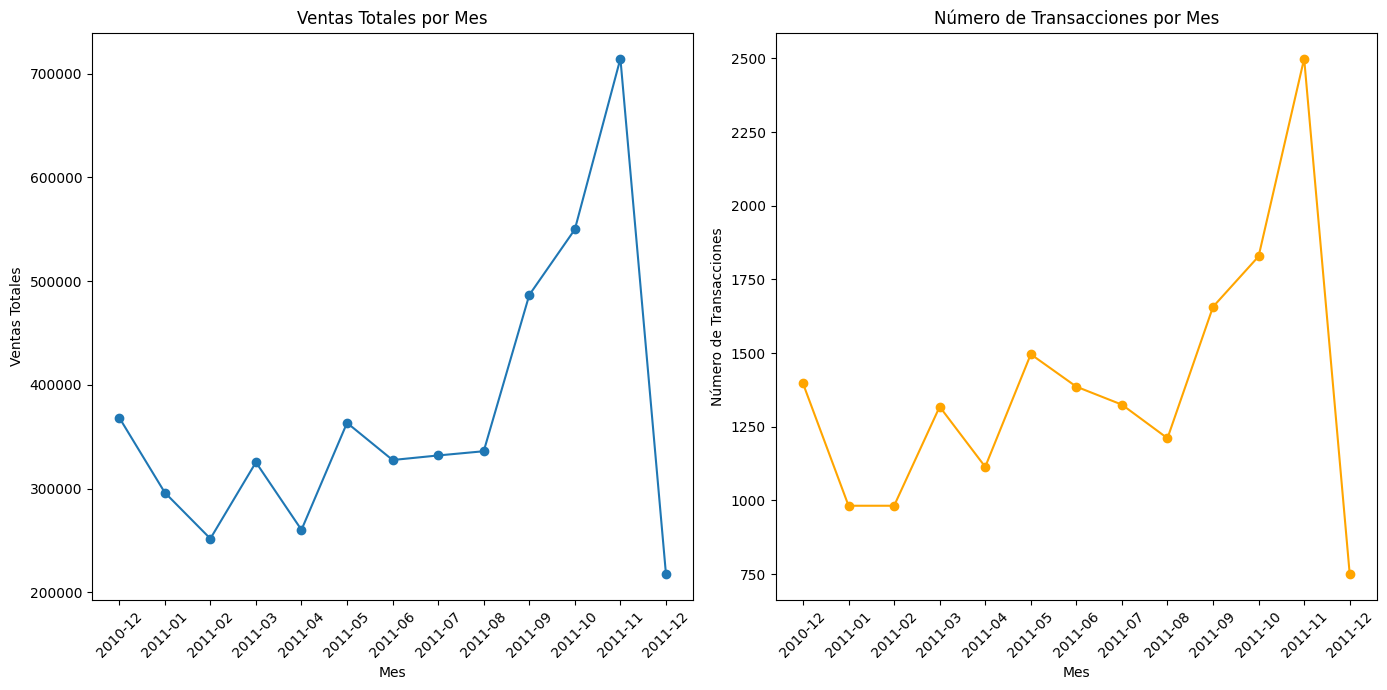

In [330]:
#visualización de los datos
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 7))

plt.subplot(1, 2, 1)
plt.plot(ventas_por_mes['YearMonth'].astype(str), ventas_por_mes['Total_Price'], marker='o')
plt.xticks(rotation=45)
plt.title('Ventas Totales por Mes')
plt.xlabel('Mes')
plt.ylabel('Ventas Totales')

plt.subplot(1, 2, 2)
plt.plot(transacciones_por_mes['YearMonth'].astype(str), transacciones_por_mes['InvoiceNo'], marker='o', color='orange')
plt.xticks(rotation=45)
plt.title('Número de Transacciones por Mes')
plt.xlabel('Mes')
plt.ylabel('Número de Transacciones')

plt.tight_layout()
plt.show()

In [337]:
# ventas de cada país
ventas_por_país=data_tienda.groupby('Country')['Total_Price'].sum().sort_values(ascending=False).reset_index()
# productos distintos vendidos por cada país
productos_únicos_país=data_tienda.groupby('Country')['StockCode'].nunique().reset_index()
# Mostrar las ventas y productos por país
ventas_por_país = ventas_por_país.sort_values(by='Total_Price', ascending=False)
productos_únicos_país = productos_únicos_país.sort_values(by='StockCode', ascending=False)

print(ventas_por_país.head(3))
print(productos_únicos_país.head(3))

          Country  Total_Price
0  United Kingdom  4252698.104
1         Germany   126982.010
2          France   108449.670
           Country  StockCode
36  United Kingdom       3681
10            EIRE       1595
14         Germany       1388


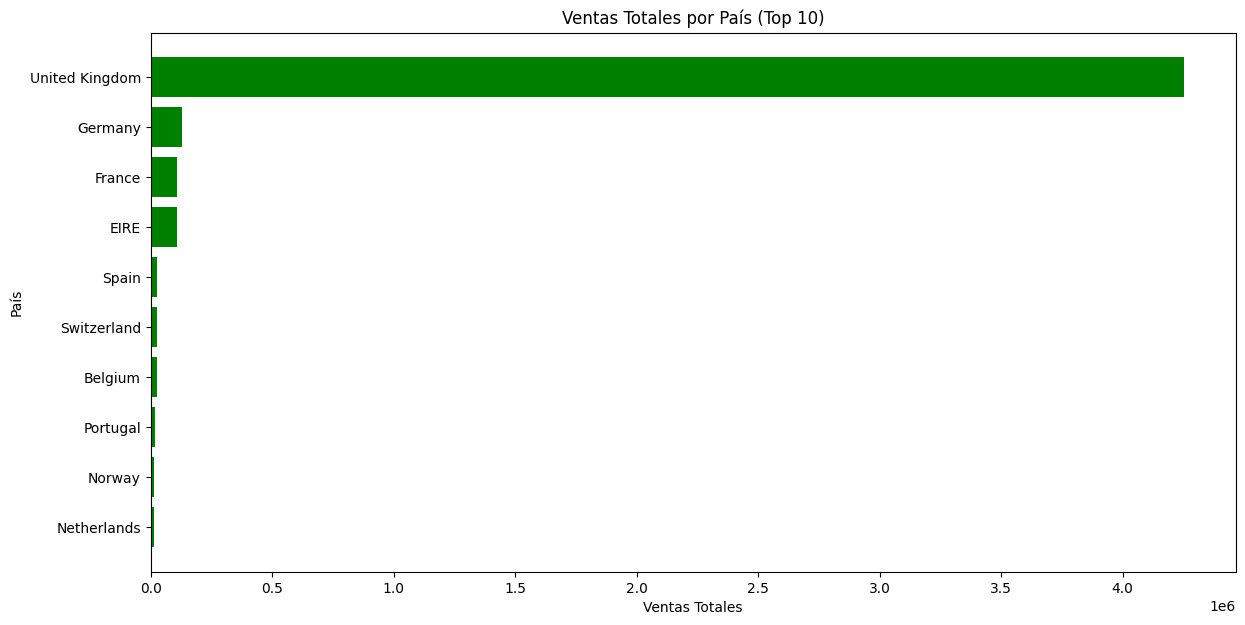

In [338]:
# gráfica de ventas con respecto al país
plt.figure(figsize=(14, 7))
plt.barh(ventas_por_país['Country'].head(10), ventas_por_país['Total_Price'].head(10), color='green')
plt.title('Ventas Totales por País (Top 10)')
plt.xlabel('Ventas Totales')
plt.ylabel('País')
plt.gca().invert_yaxis()
plt.show()

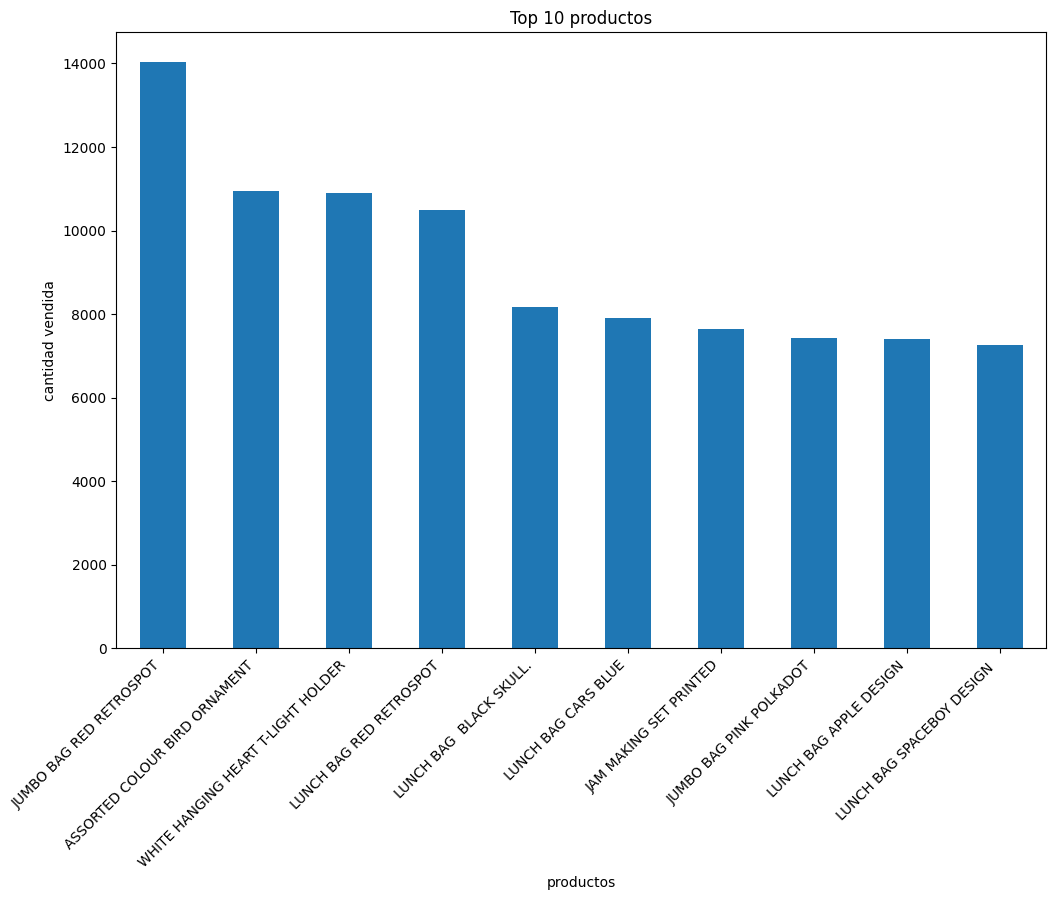

In [332]:
cantidad_por_producto=data_tienda.groupby('Description')['Quantity'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(12,8))
cantidad_por_producto.plot(kind='bar')
plt.title('Top 10 productos')
plt.xlabel('productos')
plt.xticks(rotation=45, ha='right')
plt.ylabel('cantidad vendida')
plt.show()


vamos a ver una serie temporal de las ventas

In [333]:
data_tienda.set_index('InvoiceDate',inplace=True)
print(data_tienda.head(3))


                    InvoiceNo StockCode                         Description  \
InvoiceDate                                                                   
2010-12-01 08:26:00    536365    85123A  WHITE HANGING HEART T-LIGHT HOLDER   
2010-12-01 08:26:00    536365     71053                 WHITE METAL LANTERN   
2010-12-01 08:26:00    536365    84406B      CREAM CUPID HEARTS COAT HANGER   

                     Quantity  UnitPrice  CustomerID         Country  \
InvoiceDate                                                            
2010-12-01 08:26:00         6       2.55       17850  United Kingdom   
2010-12-01 08:26:00         6       3.39       17850  United Kingdom   
2010-12-01 08:26:00         8       2.75       17850  United Kingdom   

                     Total_Price  Discounted_Price YearMonth  DayOfWeek  Hour  \
InvoiceDate                                                                     
2010-12-01 08:26:00        15.30             2.295   2010-12  Wednesday     8   


In [334]:
ventas_mes=data_tienda['Quantity'].resample('ME').sum()
print(ventas_mes,'\n')
print(data_tienda['Quantity'].resample('ME').sum().idxmax(),'\n')
print(data_tienda['Quantity'].resample('ME').sum().max(),'\n')

InvoiceDate
2010-12-31    143708
2011-01-31    131895
2011-02-28    108509
2011-03-31    143868
2011-04-30    119781
2011-05-31    158217
2011-06-30    147378
2011-07-31    156198
2011-08-31    154620
2011-09-30    221253
2011-10-31    251622
2011-11-30    325367
2011-12-31     97856
Freq: ME, Name: Quantity, dtype: int64 

2011-11-30 00:00:00 

325367 



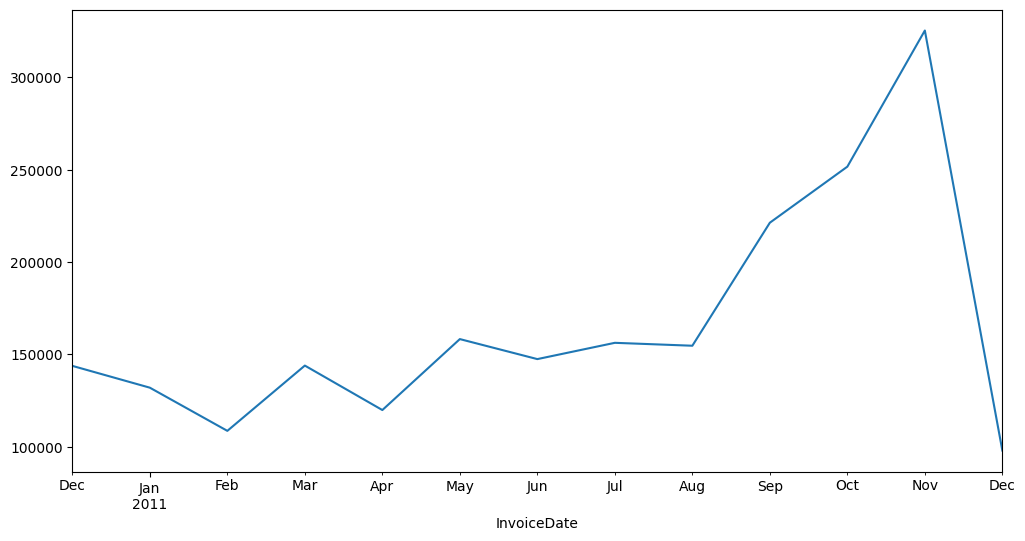

In [335]:
plt.figure(figsize=(12,6))
ventas_mes.plot(kind='line')
plt.show()

# 4.2. análisis de compra de los clientes

In [342]:
# transacciones por cliente
transacción_por_cliente=data_tienda.groupby('CustomerID')['InvoiceNo'].nunique().reset_index()

#gasto total por cliente
gasto_por_cliente=data_tienda.groupby('CustomerID')['Total_Price'].sum().reset_index()

transacción_por_cliente = transacción_por_cliente.sort_values(by='InvoiceNo', ascending=False)
gasto_por_cliente = gasto_por_cliente.sort_values(by='Total_Price', ascending=False)

print(transacción_por_cliente.head(),'\n')
print(gasto_por_cliente.head(),'\n')

      CustomerID  InvoiceNo
0             -1       1353
322        12748        193
1818       14911        192
3866       17841        123
2101       15311         91 

      CustomerID  Total_Price
0             -1    859073.18
1818       14911     78148.84
1245       14096     38290.66
3866       17841     31664.41
540        13089     27488.14 



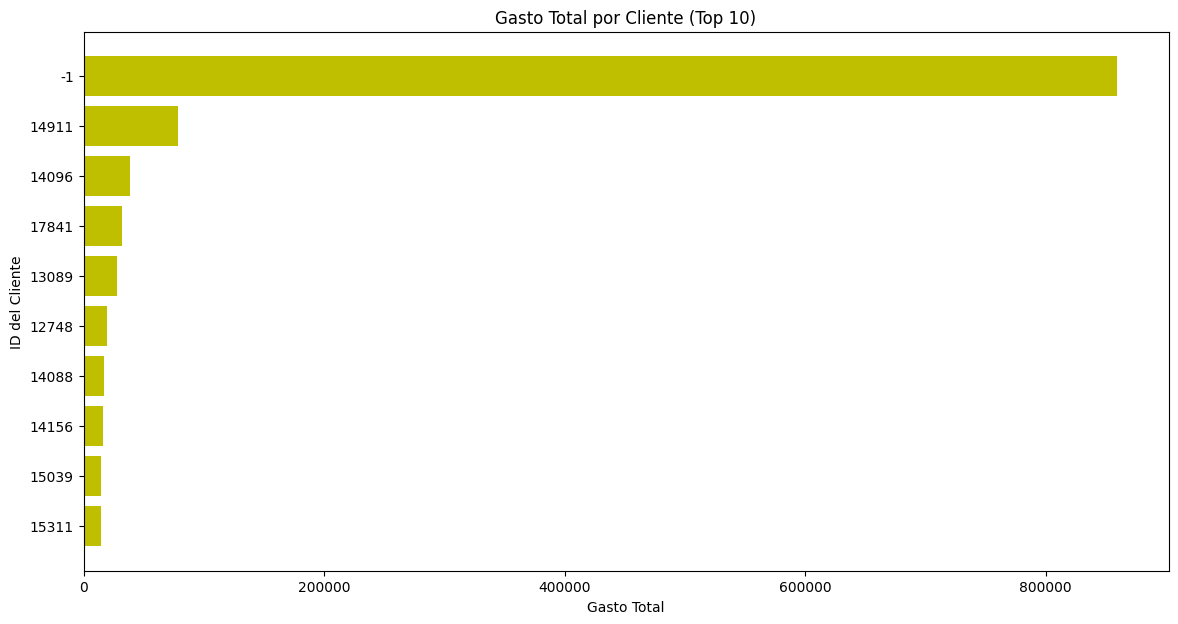

In [346]:
# Visualización de gasto por cliente (Top 10)
plt.figure(figsize=(14, 7))
plt.barh(gasto_por_cliente['CustomerID'].head(10).astype(str), gasto_por_cliente['Total_Price'].head(10), color='y')
plt.title('Gasto Total por Cliente (Top 10)')
plt.xlabel('Gasto Total')
plt.ylabel('ID del Cliente')
plt.gca().invert_yaxis()
plt.show()

# 4.3 análisis por dia y por semana

In [347]:
# Ventas totales por día de la semana
sales_by_day_of_week = data_tienda.groupby('DayOfWeek')['Total_Price'].sum().reset_index()

# Ventas totales por hora del día
sales_by_hour = data_tienda.groupby('Hour')['Total_Price'].sum().reset_index()

print(sales_by_day_of_week.head(3),'\n')
print(sales_by_hour.head(3),'\n')

  DayOfWeek  Total_Price
0    Friday   775497.651
1    Monday   816447.981
2    Sunday   498470.341 

   Hour  Total_Price
0     6         4.25
1     7      3902.03
2     8    126562.67 



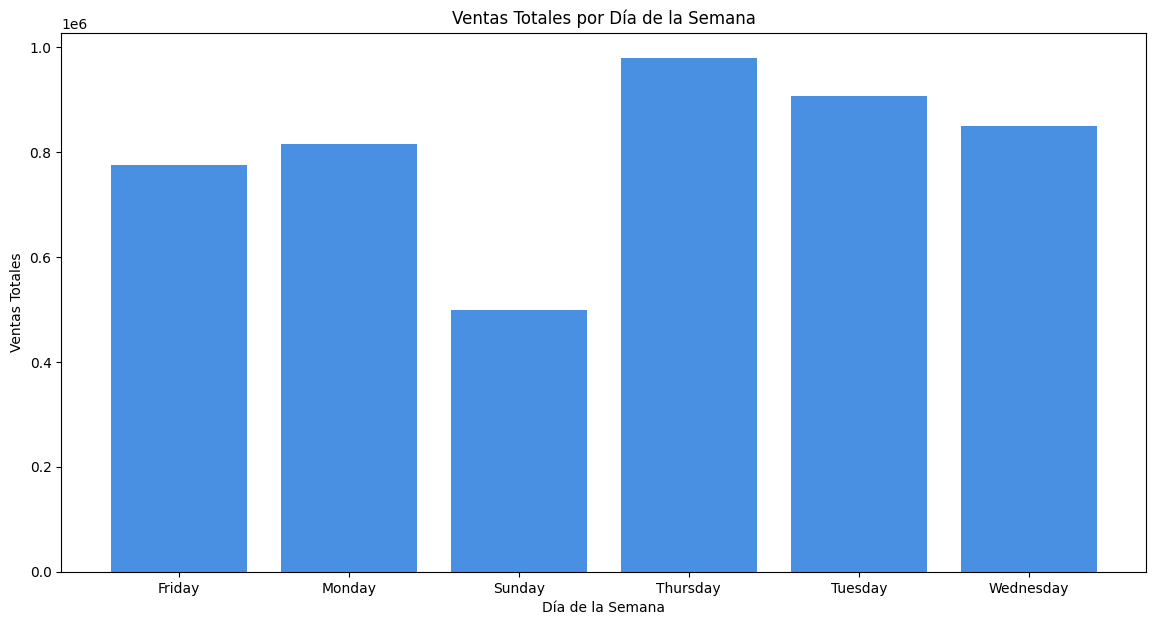

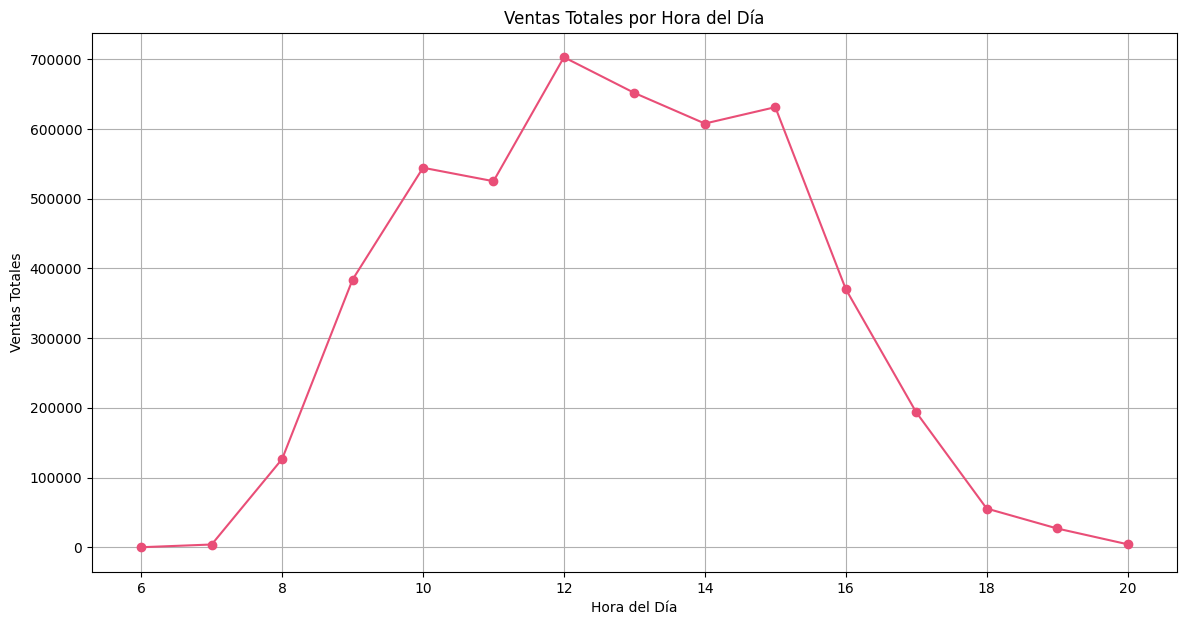

In [348]:
# Visualización de ventas por día de la semana
plt.figure(figsize=(14, 7))
plt.bar(sales_by_day_of_week['DayOfWeek'], sales_by_day_of_week['Total_Price'], color='#4A90E2' )
plt.title('Ventas Totales por Día de la Semana')
plt.xlabel('Día de la Semana')
plt.ylabel('Ventas Totales')
plt.show()

# Visualización de ventas por hora del día
plt.figure(figsize=(14, 7))
plt.plot(sales_by_hour['Hour'], sales_by_hour['Total_Price'], marker='o', color='#E94E77')
plt.title('Ventas Totales por Hora del Día')
plt.xlabel('Hora del Día')
plt.ylabel('Ventas Totales')
plt.grid(True)
plt.show()

# 5. valores determinantes

ventas

In [349]:
máximo_ventas=ventas_por_país.iloc[0]
mínimo_ventas=ventas_por_país.iloc[-1]

print("el país con las mayores ventas es : \n", máximo_ventas,'\n')
print("el país con las menores ventas es : \n", mínimo_ventas,'\n')

el país con las mayores ventas es : 
 Country        United Kingdom
Total_Price       4252698.104
Name: 0, dtype: object 

el país con las menores ventas es : 
 Country        Saudi Arabia
Total_Price          145.92
Name: 37, dtype: object 



gasto por cliente

In [351]:
max_gasto_cliente=gasto_por_cliente.iloc[0]
min_gasto_cliente=gasto_por_cliente.iloc[-1]

print("el cliente con las mayores compras es  : \n", max_gasto_cliente,'\n')
print("el cliente con las menores compras es  : \n", min_gasto_cliente,'\n')

el cliente con las mayores compras es  : 
 CustomerID         -1.00
Total_Price    859073.18
Name: 0, dtype: float64 

el cliente con las menores compras es  : 
 CustomerID     17942.0
Total_Price        1.9
Name: 3939, dtype: float64 



transacciones por cliente

In [352]:
max_transactions_customer = transacción_por_cliente.iloc[0]
min_transactions_customer = transacción_por_cliente.iloc[-1]

print("el cliente con las mayores transacciones es  : \n", max_transactions_customer,'\n')
print("el cliente con las menores transacciones es  : \n", min_transactions_customer,'\n')

el cliente con las mayores transacciones es  : 
 CustomerID      -1
InvoiceNo     1353
Name: 0, dtype: int64 

el cliente con las menores transacciones es  : 
 CustomerID    13886
InvoiceNo         1
Name: 1097, dtype: int64 



ventas totales por dia de la semana

In [353]:
sales_by_day_of_week = data_tienda.groupby('DayOfWeek')['Total_Price'].sum().reset_index()
max_sales_day = sales_by_day_of_week[sales_by_day_of_week['Total_Price'] == sales_by_day_of_week['Total_Price'].max()]
min_sales_day = sales_by_day_of_week[sales_by_day_of_week['Total_Price'] == sales_by_day_of_week['Total_Price'].min()]


print("Día de la semana con las ventas más altas es  : \n", max_sales_day,'\n')
print("Día de la semana con las ventas más bajas es  : \n", min_sales_day,'\n')

Día de la semana con las ventas más altas es  : 
   DayOfWeek  Total_Price
3  Thursday    979140.31 

Día de la semana con las ventas más bajas es  : 
   DayOfWeek  Total_Price
2    Sunday   498470.341 



ventas totales por hora del dia

In [354]:
sales_by_hour = data_tienda.groupby('Hour')['Total_Price'].sum().reset_index()
max_sales_hour = sales_by_hour[sales_by_hour['Total_Price'] == sales_by_hour['Total_Price'].max()]
min_sales_hour = sales_by_hour[sales_by_hour['Total_Price'] == sales_by_hour['Total_Price'].min()]

print("Hora del día con las ventas más altas es  : \n", max_sales_hour,'\n')
print("Hora del día con las ventas más bajas es  : \n", min_sales_hour,'\n')

Hora del día con las ventas más altas es  : 
    Hour  Total_Price
6    12    702999.13 

Hora del día con las ventas más bajas es  : 
    Hour  Total_Price
0     6         4.25 

